<a href="https://colab.research.google.com/github/ptandon0/FRP_Curriculum_2023/blob/main/FRP_Curriculum_Getting_and_Knowing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="http://cds-dev01.mountsinai.org/">
<img src='https://upload.wikimedia.org/wikipedia/commons/b/b1/Mount_Sinai_Health_System_Logo.jpg' alt="Drawing" style="width: 300px;float: left;"> </a>

# **Fellows Research Program - Getting and Knowing Data**

Before you start addressing your research questions, you should have a familiarity with the data you are working with.

This process is called *data exploration*. You should have an intuitive understanding of what data you have fetched, and what its limitations are before using it for further work.

What are some questions to ask when you first recieve a dataset?

## **Fellows Responses Go Here**

## Questions I think of when getting a dataset for the first time are: ##



- What is the size of my dataset?
- How many columns and how many rows?
- Also are any rows duplicated?
- What does each row mean?
- How are rows linked?
- What datatypes are in each column? (strings, numbers, other)
- How much missingness is there, and are missing data random?
- What are the distinct values in each categorical column? How are they distributed?
- What is the distribution of data in each numerical column?
- Are any of the rows colinear or directly related to each other?

## **Let's Practice with a very popular learning dataset - the Chipotle Orders Dataset from Kaggle** ##

## **Importing and first impressions of dataset** ##

<a href="http://cds-dev01.mountsinai.org/">
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Chipotle_Brandon.jpeg/2880px-Chipotle_Brandon.jpeg' alt="Drawing" style="width: 200px;float: left;"> </a>

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats

%matplotlib inline

In [2]:
# import chipotle dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### First, just look through the data with your eyes and scroll around.

What do you see?

In [3]:
chipo.head(50)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### What is the size of this dataset?

In [4]:
print("There are", chipo.shape[0], "rows and", chipo.shape[1],"columns in this dataset.")

There are 4622 rows and 5 columns in this dataset.


### Are any rows duplicated?

In [5]:
print("There are", chipo.shape[0] - chipo.drop_duplicates().shape[0], "duplicate rows in this dataset")

There are 59 duplicate rows in this dataset


In [6]:
print("The duplicate rows are:")
chipo[chipo.duplicated(keep=False)]

The duplicate rows are:


,order_id,quantity,item_name,choice_description,item_price
234,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
238,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
246,108,1,Canned Soda,[Mountain Dew],$1.09
248,108,1,Canned Soda,[Mountain Dew],$1.09
296,129,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, G...",$11.75
...,...,...,...,...,...
4544,1806,1,Bottled Water,NaN,$1.50
4568,1817,1,Bottled Water,NaN,$1.50
4570,1817,1,Bottled Water,NaN,$1.50
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],$9.25


### Remove the duplicate rows.

In [7]:
chipo = chipo.drop_duplicates()
print("The dataset without duplicates has", chipo.shape[0], "rows and", chipo.shape[1], "columns. \n It looks like this:")
chipo.head(20)

The dataset without duplicates has 4563 rows and 5 columns. 
 It looks like this:


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### What does each row mean?

### What are the column names?

### Are rows linked?

### What is your expected datatype in each column?

In [8]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

Choice Description just says "object" and I'm not sure what is inside or its structure. Lets open up that one column so we can read the whole text and see what we can find out.

In [9]:
list(chipo.choice_description.head(50))

[nan,
 '[Clementine]',
 '[Apple]',
 nan,
 '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',
 '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',
 nan,
 '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',
 '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]',
 '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]',
 nan,
 '[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream]]',
 '[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Sour Cream]]',
 '[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]',
 nan,
 nan,
 '[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Cheese, Sour Cream]]',
 '[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]]',
 '[Sprite]',
 '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Sour Crea

### What is the datatype and underlying structure to the choice_description column?

- Drinks have a string of a list with a single element which flavor of izze.

- Entres have a string version of [[salsas1, salsa2], [topping1, topping2]].


- But if there is only one element in each list they have it as just [salsa, [topping1, topping2]] or [[salsa1, salsa2], topping].

- From what we have seen we cannot know if there are any entres with no toppings or no salsas.
- This will pose specific cleaning issues later on if we chose to explore toppings and salsas.



### Can we transform the item_price column into something workable?

The price column is a string of text that starts with "$", followed by a number with two decimal places. To do things like calculate cost per order we need to discard the dollar sign and transfrom the text into a decimal number we can add/subtract/multiply/etc.


In [10]:
chipo["total_price"] = chipo.item_price.str.slice(1).apply(float)
chipo["price_per_item"] = chipo.total_price / chipo.quantity
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price,price_per_item
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98,10.98
6,3,1,Side of Chips,NaN,$1.69,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25,9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25,9.25,9.25


In [11]:
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
total_price           float64
price_per_item        float64
dtype: object

### What data are missing? Is there a pattern?


In [12]:
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1228
item_price               0
total_price              0
price_per_item           0
dtype: int64

Only choice_description is null. Lets see what is null there.

In [13]:
chipo[chipo.choice_description.isnull()]

,order_id,quantity,item_name,choice_description,item_price,total_price,price_per_item
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
6,3,1,Side of Chips,NaN,$1.69,1.69,1.69
10,5,1,Chips and Guacamole,NaN,$4.45,4.45,4.45
14,7,1,Chips and Guacamole,NaN,$4.45,4.45,4.45
...,...,...,...,...,...,...,...
4600,1827,1,Chips and Guacamole,NaN,$4.45,4.45,4.45
4605,1828,1,Chips and Guacamole,NaN,$4.45,4.45,4.45
4613,1831,1,Chips,NaN,$2.15,2.15,2.15
4614,1831,1,Bottled Water,NaN,$1.50,1.50,1.50


In [14]:
print("The items with null choice_description are:")
chipo[chipo.choice_description.isnull()].item_name.unique().tolist()

The items with null choice_description are:


['Chips and Fresh Tomato Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Side of Chips',
 'Chips and Guacamole',
 'Bottled Water',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Chips and Mild Fresh Tomato Salsa']

Only assorted chips +/- salsa and bottled water have a null choice description.

## **Let's assess what some of the values are in the dataset** ##

### Can we generally describe the numerical values in the dataset? Most of your data handling environments will have a "describe' function of some kind.

In [15]:
chipo.describe()

,order_id,quantity,total_price,price_per_item
count,4563.000000,4563.000000,4563.000000,4563.000000
mean,927.045803,1.076704,7.490083,7.105260
std,528.936100,0.412739,4.244155,3.658207
min,1.000000,1.000000,1.090000,1.090000
25%,476.500000,1.000000,3.750000,2.950000
50%,926.000000,1.000000,8.750000,8.750000
75%,1393.000000,1.000000,9.250000,9.250000
max,1834.000000,15.000000,44.250000,11.890000


This is one good way to *look for outliers*. What sticks out to you?
- somebody ordered 15 of one thing in an order?
- What item costs $44?
- What item only costs $1.09?


In [16]:
chipo.sort_values("quantity", ascending=False).head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price,price_per_item
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25,2.95
4152,1660,10,Bottled Water,NaN,$15.00,15.00,1.50
3887,1559,8,Side of Chips,NaN,$13.52,13.52,1.69
3599,1443,7,Bottled Water,NaN,$10.50,10.50,1.50
2441,970,5,Bottled Water,NaN,$7.50,7.50,1.50
4491,1786,4,Canned Soft Drink,[Sprite],$5.00,5.00,1.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$35.00,35.00,8.75
4490,1786,4,Canned Soft Drink,[Coke],$5.00,5.00,1.25
4489,1786,4,Chips and Guacamole,NaN,$17.80,17.80,4.45
1425,577,4,Bottled Water,NaN,$6.00,6.00,1.50


In [17]:
chipo.sort_values("price_per_item")

,order_id,quantity,item_name,choice_description,item_price,total_price,price_per_item
780,321,1,Bottled Water,NaN,$1.09,1.09,1.09
2922,1162,1,Bottled Water,NaN,$1.09,1.09,1.09
3254,1303,1,Canned Soda,[Sprite],$1.09,1.09,1.09
3499,1405,1,Bottled Water,NaN,$1.09,1.09,1.09
352,151,2,Canned Soda,[Coca Cola],$2.18,2.18,1.09
...,...,...,...,...,...,...,...
1159,478,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",$11.89,11.89,11.89
3546,1426,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, Guacamole]",$11.89,11.89,11.89
606,250,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Pinto Beans, Cheese, Gua...",$11.89,11.89,11.89
1505,612,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",$11.89,11.89,11.89


Can we visualize some of the distribution?

What is the distribution of total price per line item?

Text(0.5, 1.0, 'Distribution of total price per line item')

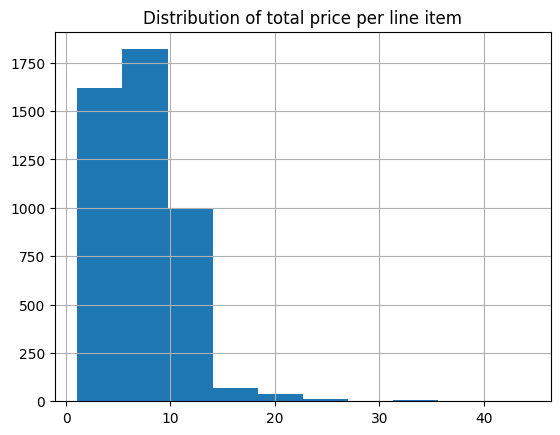

In [18]:
ax = chipo.total_price.hist()
ax.set_title("Distribution of total price per line item")

What about for the quantity of items per order?

In [19]:
chipo.groupby("order_id")["quantity"].sum().describe()

count    1834.000000
mean        2.678844
std         1.641962
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: quantity, dtype: float64

Text(0.5, 1.0, 'Distribution of quanity items per order ')

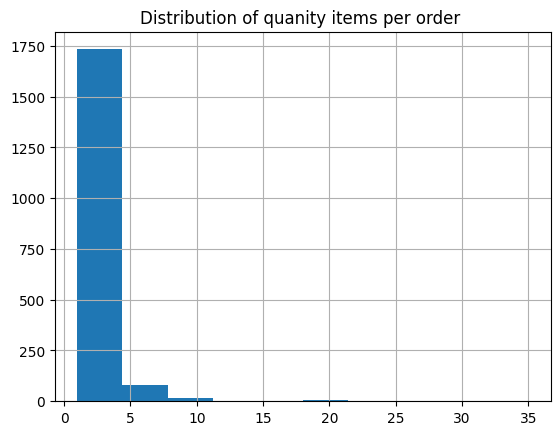

In [20]:
ax  = chipo.groupby("order_id")["quantity"].sum().hist()
ax.set_title("Distribution of quanity items per order ")

What is the distribution of total price per order?

In [21]:
chipo.groupby("order_id")["total_price"].sum().describe()

count    1834.000000
mean       18.635360
std        11.352562
min         8.750000
25%        12.500000
50%        15.740000
75%        21.950000
max       187.750000
Name: total_price, dtype: float64

Text(0.5, 1.0, 'Distribution of total price per order')

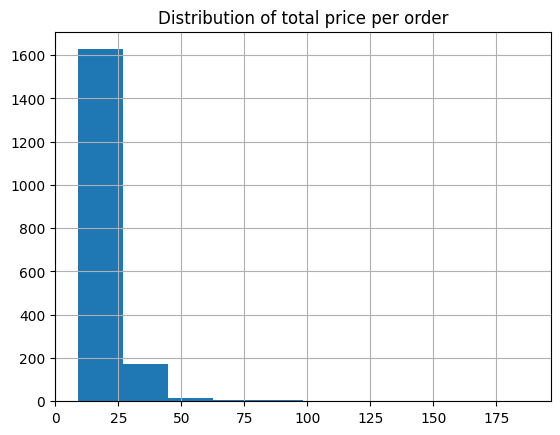

In [23]:
ax = chipo.groupby("order_id")["total_price"].sum().hist()
ax.set_title("Distribution of total price per order")

Is the price per item constant, or does it vary over time and or store?

In [40]:
by_item = chipo.groupby("item_name").agg({"price_per_item": ["max", "min"]})
by_item["item_price_range"] = round(by_item["price_per_item"]["max"] - by_item["price_per_item"]["min"],2)
by_item_out = by_item[by_item.item_price_range > 0].sort_values("item_price_range", ascending=False)
by_item_out

price_per_item       item_price_range
                                        max   min                 
item_name                                                         
Barbacoa Bowl                         11.75  8.69             3.06
Steak Crispy Tacos                    11.75  8.69             3.06
Steak Burrito                         11.75  8.69             3.06
Carnitas Burrito                      11.75  8.69             3.06
Steak Bowl                            11.75  8.69             3.06
Barbacoa Burrito                      11.75  8.69             3.06
Chicken Bowl                          11.25  8.19             3.06
Chicken Burrito                       11.25  8.19             3.06
Chicken Salad                         10.98  8.19             2.79
Veggie Burrito                        11.25  8.49             2.76
Veggie Bowl                           11.25  8.49             2.76
Steak Soft Tacos                      11.75  8.99             2.76
Chicken Soft Tacos                    11.25  8.49             2.76
Veggie Soft Tacos                     11.25  8.49             2.76
Chicken Crispy Tacos                  11.25  8.49             2.76
Carnitas Soft Tacos                   11.75  8.99             2.76
Carnitas Crispy Tacos                 11.75  8.99             2.76
Carnitas Bowl                         11.75  8.99             2.76
Barbacoa Soft Tacos                   11.75  8.99             2.76
Barbacoa Crispy Tacos                 11.75  8.99             2.76
Carnitas Salad Bowl                   11.89  9.39             2.50
Steak Salad Bowl                      11.89  9.39             2.50
Barbacoa Salad Bowl                   11.89  9.39             2.50
Veggie Salad Bowl                     11.25  8.75             2.50
Chicken Salad Bowl                    11.25  8.75             2.50
Chips and Fresh Tomato Salsa           2.95  2.29             0.66
Chips and Guacamole                    4.45  3.89             0.56
Bottled Water                          1.50  1.09             0.41
Steak Salad                            8.99  8.69             0.30
Chips                                  2.15  1.99             0.16

Text(0.5, 1.0, 'Distribution of range of prices per item')

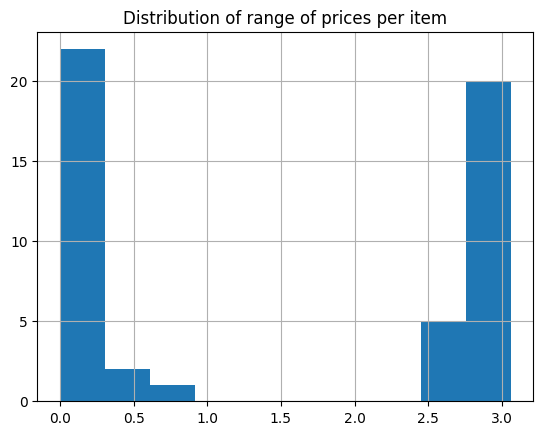

In [42]:
ax = by_item.item_price_range.hist()
ax.set_title("Distribution of range of prices per item")

Beautiful bimodal distribution with drinks, chips and water on one side with almost no price variance, and main dishes on the other side which vary in price a lot.

### What about the categorical data, what does it look like? ###

In [150]:
#### Item Names - what are the unique items sold?

In [151]:
chipo.item_name.unique().tolist()

['Chips and Fresh Tomato Salsa',
 'Izze',
 'Nantucket Nectar',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chicken Bowl',
 'Side of Chips',
 'Steak Burrito',
 'Steak Soft Tacos',
 'Chips and Guacamole',
 'Chicken Crispy Tacos',
 'Chicken Soft Tacos',
 'Chicken Burrito',
 'Canned Soda',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Carnitas Bowl',
 'Bottled Water',
 'Chips and Tomatillo Green Chili Salsa',
 'Barbacoa Bowl',
 'Chips',
 'Chicken Salad Bowl',
 'Steak Bowl',
 'Barbacoa Soft Tacos',
 'Veggie Burrito',
 'Veggie Bowl',
 'Steak Crispy Tacos',
 'Chips and Tomatillo Red Chili Salsa',
 'Barbacoa Crispy Tacos',
 'Veggie Salad Bowl',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Carnitas Soft Tacos',
 'Chicken Salad',
 'Canned Soft Drink',
 'Steak Salad Bowl',
 '6 Pack Soft Drink',
 'Chips and Tomatillo-Red Chili Salsa',
 'Bowl',
 'Burrito',
 'Crispy Tacos',
 'Carnitas Crispy Tacos',
 'Steak Salad',
 'Chips and Mild Fresh Tomato Salsa',
 'Veggie Soft 

In [152]:
chipo.groupby("item_name")["order_id"].count().sort_values(ascending=False)

item_name
Chicken Bowl                             717
Chicken Burrito                          546
Chips and Guacamole                      474
Steak Burrito                            365
Canned Soft Drink                        290
Steak Bowl                               210
Chips                                    208
Bottled Water                            155
Chicken Soft Tacos                       111
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              102
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          90
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             65
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chicken Crispy Tacos                      47


<Axes: xlabel='item_name'>

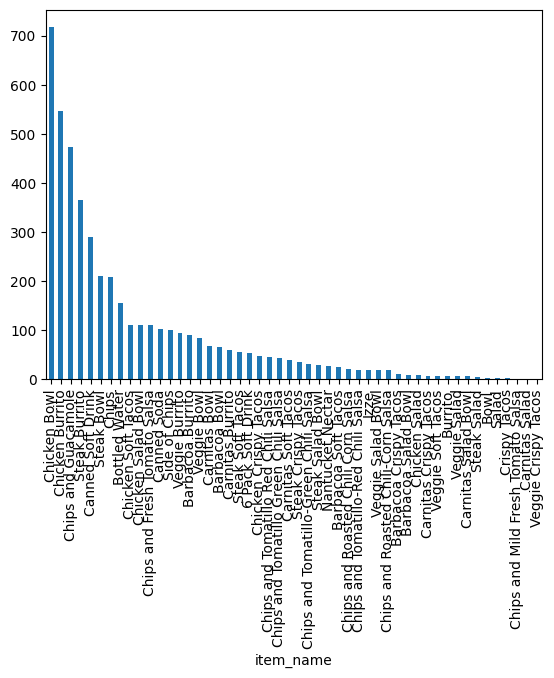

In [153]:
chipo.groupby("item_name")["order_id"].count().sort_values(ascending=False).plot(kind="bar")

This is very busy, why don't we separate it out into drinks, sides, and mains?

In [154]:
drinks = ['Izze','Nantucket Nectar','Bottled Water', '6 Pack Soft Drink', 'Canned Soda']

sides = ['Chips and Fresh Tomato Salsa','Chips and Tomatillo-Green Chili Salsa','Side of Chips','Chips and Guacamole','Chips and Tomatillo Green Chili Salsa','Chips','Chips and Tomatillo Red Chili Salsa',
          'Chips and Roasted Chili-Corn Salsa','Chips and Roasted Chili Corn Salsa','Chips and Tomatillo-Red Chili Salsa','Chips and Mild Fresh Tomato Salsa']


mains = list(set(chipo.item_name) - set(drinks) - set(sides))


### What are the most popular drinks, sides, and mains? ###

Text(0.5, 1.0, 'Number of drinks ordered in Chipotle Orderset')

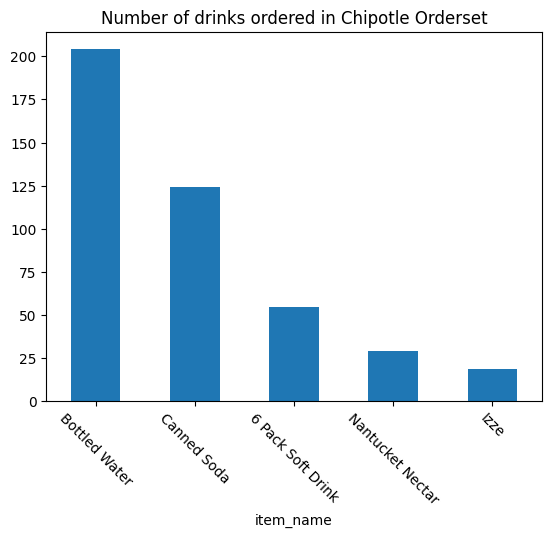

In [119]:
ax = chipo[chipo.item_name.isin(drinks)].groupby("item_name")["quantity"].sum().sort_values(ascending=False).plot(kind="bar", rot = -45)
ax.set_title("Number of drinks ordered in Chipotle Orderset")

Text(0.5, 1.0, 'Number of sides ordered in Chipotle Orderset')

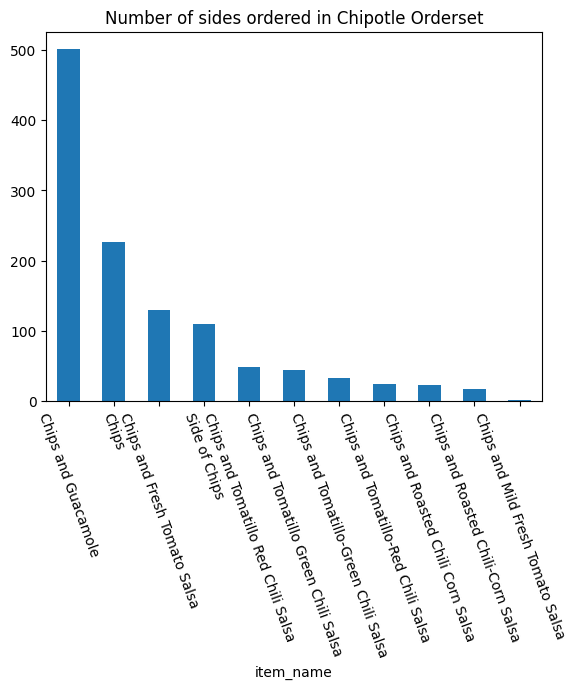

In [121]:
ax = chipo[chipo.item_name.isin(sides)].groupby("item_name")["quantity"].sum().sort_values(ascending=False).plot(kind="bar", rot = -70)
ax.set_title("Number of sides ordered in Chipotle Orderset")

Text(0.5, 1.0, 'Number of mains ordered in Chipotle Orderset')

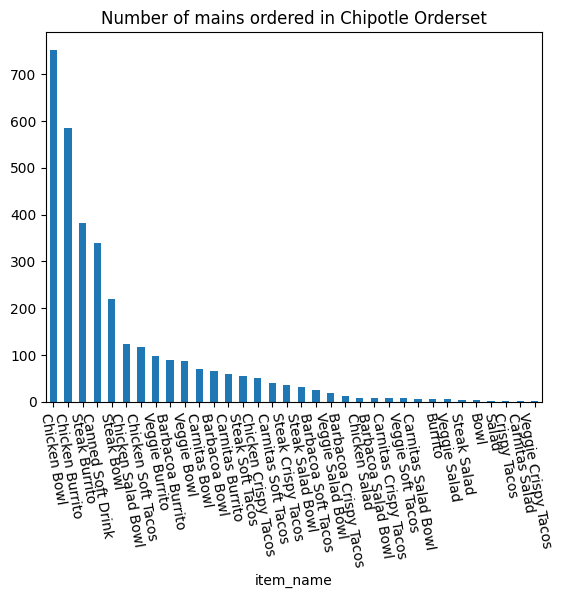

In [122]:
ax = chipo[chipo.item_name.isin(mains)].groupby("item_name")["quantity"].sum().sort_values(ascending=False).plot(kind="bar", rot = -80)
ax.set_title("Number of mains ordered in Chipotle Orderset")

#### If we wanted to we could do things like figure out what kind of izze is most popular, split the mains into tacos, bowls, burritos, and salads, etc.

## **Surely a lot of this must be automated by now?** ##

### Why yes, there are premade packages you can use to explore data. Especially as we start looking at 2x2 correlations. ###

Plot correlation heatmap of numeric data in the dataframe.

<ipython-input-169-533111996aae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = chipo[chipo.item_name.isin(top10)][["quantity", "item_name", "total_price", "price_per_item"]].corr()


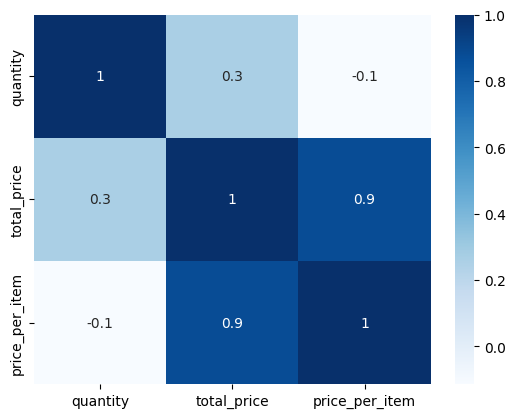

In [169]:
top10 = chipo.groupby("item_name")["quantity"].sum().sort_values(ascending=False).head(10).index.tolist()

corr = chipo[chipo.item_name.isin(top10)][["quantity", "item_name", "total_price", "price_per_item"]].corr()

heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')



As Expected, because total price = price per item * quantity, the correlation between these are 0.9.

However, while price_per_item and quantity seems to be unrelated, this does not include the relationship of the item type. We can see this by adding item type as a part of the pair plot.

Plot a pair plot grouped by item_name for the top 10 items.

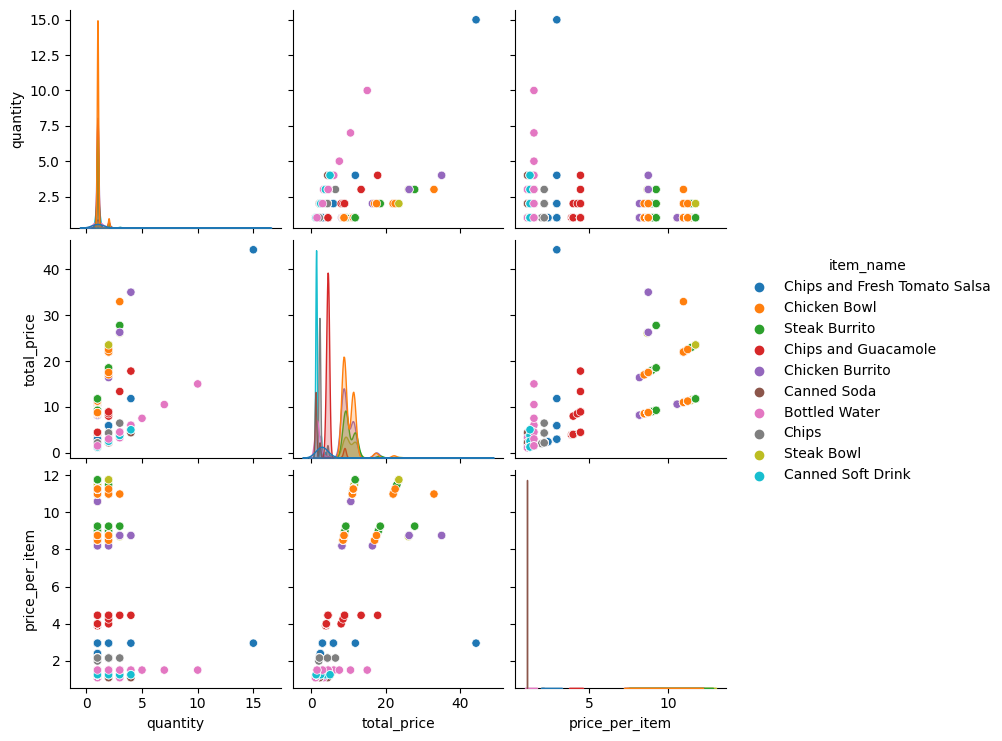

In [170]:
top10 = chipo.groupby("item_name")["quantity"].sum().sort_values(ascending=False).head(10).index.tolist()

sns.pairplot(chipo[chipo.item_name.isin(top10)][["quantity", "item_name", "total_price", "price_per_item"]], hue="item_name")

#### Google colab also provides a built-in data explorer, click the icons next to the raw dataframe

In [146]:
chipo

,order_id,quantity,item_name,choice_description,item_price,total_price,price_per_item
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75


import numpy as np
from google.colab import autoviz
df_1444458271929221226 = autoviz.get_df('df_1444458271929221226')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1444458271929221226, *['order_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4492164138642983984 = autoviz.get_df('df_4492164138642983984')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4492164138642983984, *['quantity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4395522535576252749 = autoviz.get_df('df_4395522535576252749')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4395522535576252749, *['total_price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5719122865854537300 = autoviz.get_df('df_5719122865854537300')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5719122865854537300, *['price_per_item'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7311097502914759840 = autoviz.get_df('df_7311097502914759840')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7311097502914759840, *['order_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8438380577996138428 = autoviz.get_df('df_8438380577996138428')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8438380577996138428, *['quantity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7571053887562513784 = autoviz.get_df('df_7571053887562513784')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7571053887562513784, *['total_price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5553466013581765314 = autoviz.get_df('df_5553466013581765314')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5553466013581765314, *['price_per_item'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5402827756037488403 = autoviz.get_df('df_5402827756037488403')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5402827756037488403, *[[['order_id', 'quantity'], ['quantity', 'total_price'], ['total_price', 'price_per_item']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8675975001303921546 = autoviz.get_df('df_8675975001303921546')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8675975001303921546, *['order_id', 'quantity', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8799505003827893395 = autoviz.get_df('df_8799505003827893395')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8799505003827893395, *['order_id', 'total_price', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7045364078270708342 = autoviz.get_df('df_7045364078270708342')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7045364078270708342, *['order_id', 'price_per_item', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2133738735166118335 = autoviz.get_df('df_2133738735166118335')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2133738735166118335, *['order_id', 'count()', None], **{})
chart

## **Now you have a pretty good sense of what is in the dataset, and will be able to use it to answer questions you may have.** ##